In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
import math

In [23]:
data = pd.read_csv('results.csv')

### Geometric Mean Confidence Intervals

In [36]:
confidence = 0.95

z_val = 1.96

In [37]:
results = []

for (group, df) in data.groupby('strategy'):
    m = df['geometric_mean'].mean()
    std = df['geometric_mean'].std()
    n = len(df)
    if n > 30:
        t_val = z_val
    else:
        t_val = t.ppf((1 + confidence) / 2, n - 1)
    h = (std * t_val) / math.sqrt(n)
    lower_ci, upper_ci = m - h, m + h
    
    results.append([group, m, std, n, t_val, lower_ci, upper_ci])
    
pd.DataFrame(results, columns=['strategy', 'mean', 'std', 'n', 't-val', 'lower_ci', 'upper_ci'])

,strategy,mean,std,n,t-val,lower_ci,upper_ci
0,default,0.442057,0.283656,390,1.96,0.413904,0.470209
1,optimal,0.733380,0.013250,390,1.96,0.732065,0.734695
2,theoretical,0.732003,0.015397,390,1.96,0.730474,0.733531


### TPR Confidence Intervals

In [38]:
results = []

for (group, df) in data.groupby('strategy'):
    m = df['tpr'].mean()
    std = df['tpr'].std()
    n = len(df)
    if n > 30:
        t_val = z_val
    else:
        t_val = t.ppf((1 + confidence) / 2, n - 1)
    h = (std * t_val) / math.sqrt(n)
    lower_ci, upper_ci = m - h, m + h
    
    results.append([group, m, std, n, t_val, lower_ci, upper_ci])

pd.DataFrame(results, columns=['strategy', 'mean', 'std', 'n', 't-val', 'lower_ci', 'upper_ci'])

,strategy,mean,std,n,t-val,lower_ci,upper_ci
0,default,0.462172,0.371949,390,1.96,0.425256,0.499087
1,optimal,0.727628,0.021129,390,1.96,0.725531,0.729725
2,theoretical,0.719532,0.035033,390,1.96,0.716055,0.723009


### TNR Confidence Intervals


In [48]:
results = []

for (group, df) in data.groupby('strategy'):
    m = df['tnr'].mean()
    std = df['tnr'].std()
    n = len(df)
    if n > 30:
        t_val = z_val
    else:
        t_val = t.ppf((1 + confidence) / 2, n - 1)
    h = (std * t_val) / math.sqrt(n)
    lower_ci, upper_ci = m - h, m + h
    
    results.append([group, m, std, n, t_val, lower_ci, upper_ci])

pd.DataFrame(results, columns=['strategy', 'mean', 'std', 'n', 't-val', 'lower_ci', 'upper_ci'])

,strategy,mean,std,n,t-val,lower_ci,upper_ci
0,default,0.782523,0.260588,390,1.96,0.756661,0.808386
1,optimal,0.739879,0.030381,390,1.96,0.736864,0.742894
2,theoretical,0.746998,0.049189,390,1.96,0.742116,0.751880


In [40]:
data.head()


,minority_size,strategy,threshold,tp,fp,tn,fn,tpr,tnr,roc_auc,geometric_mean,arithmetic_mean,f1_score,precision
0,1.0,optimal,0.010,11256,193696,491287,3761,0.749551,0.717225,0.809787,0.733210,0.733388,0.102342,0.054920
1,1.0,theoretical,0.010,11256,193696,491287,3761,0.749551,0.717225,0.809787,0.733210,0.733388,0.102342,0.054920
2,1.0,default,0.500,0,0,684983,15017,0.000000,1.000000,0.809787,0.000000,0.500000,0.000000,0.000000
3,0.5,optimal,0.003,11386,215285,469698,3631,0.758207,0.685708,0.797226,0.721047,0.721957,0.094221,0.050231
4,0.5,theoretical,0.005,9064,116142,568841,5953,0.603583,0.830445,0.797226,0.707985,0.717014,0.129280,0.072393


In [44]:
mask = data.strategy.isin(['optimal', 'theoretical'])

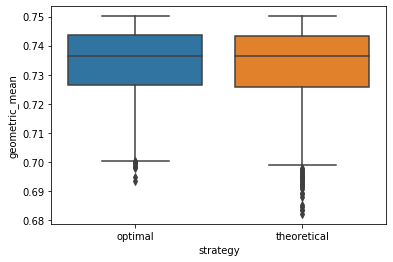

In [45]:
sns.boxplot(data=data[mask], y='geometric_mean', x='strategy')

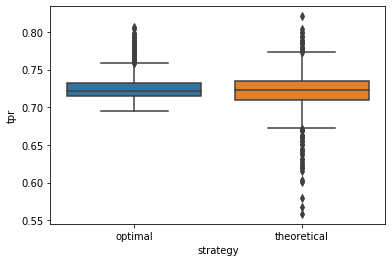

In [46]:
sns.boxplot(data=data[mask], y='tpr', x='strategy')

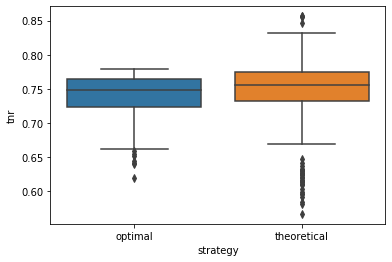

In [47]:
sns.boxplot(data=data[mask], y='tnr', x='strategy')

In [ ]:
b